# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier

# from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy


In [2]:
df = pd.read_csv('Mod10 - previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [4]:
df.drop(['Unnamed: 0', 'data_ref', 'index', 'mau'], axis = 1, inplace = True)

df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


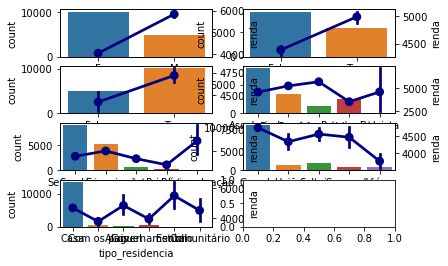

In [5]:
# 1.

plt.rc('figure', figsize=(15, 15))

fig, axes = plt.subplots(4, 2)

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax5 = axes[2,0]
ax6 = axes[2,1]
ax7 = axes[3,0]

sns.countplot(x = 'sexo', data = df, ax = ax1)
ax1b = ax1.twinx()
ax1b = sns.pointplot(x="sexo", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

sns.countplot(x = 'posse_de_veiculo', data = df, ax = ax2)
ax2b = ax2.twinx()
ax2b = sns.pointplot(x="posse_de_veiculo", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

sns.countplot(x = 'posse_de_imovel', data = df, ax = ax3)
ax3b = ax3.twinx()
ax3b = sns.pointplot(x="posse_de_imovel", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

sns.countplot(x = 'tipo_renda', data = df, ax = ax4)
ax4b = ax4.twinx()
ax4b = sns.pointplot(x="tipo_renda", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

sns.countplot(x = 'educacao', data = df, ax = ax5)
ax5b = ax5.twinx()
ax5b = sns.pointplot(x="educacao", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

sns.countplot(x = 'estado_civil', data = df, ax = ax6)
ax6b = ax6.twinx()
ax6b = sns.pointplot(x="estado_civil", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

sns.countplot(x = 'tipo_residencia', data = df, ax = ax7)
ax7b = ax7.twinx()
ax7b = sns.pointplot(x="tipo_residencia", y="renda", data=df, dodge=True, ci = 90, color = 'navy')

    . As maiores frequências são:
        - sexo = F
        - posse_de_veiculo = False
        - posse_de_imovel = True
        - tipo_renda = Assalariado
        - educacao = Secundário
        - estado_civil = Casado
        - tipo_residencia = Casa

In [6]:
y, X = patsy.dmatrices('''np.log(renda) ~ sexo
                                        + posse_de_veiculo
                                        + C(posse_de_imovel, Treatment(1))
                                        + qtd_filhos
                                        + C(tipo_renda, Treatment(0))
                                        + C(educacao, Treatment(2))
                                        + estado_civil
                                        + C(tipo_residencia, Treatment(1))
                                        + idade
                                        + tempo_emprego
                                        + qt_pessoas_residencia
                                        ''', data = df)



sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:19:01   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12441   BIC:                         2.664e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3242      0.258     28.409      0.000       6.819       7.830
sexo[T.M]                                             0.4813      0.014     33.673      0.000       0.453       0.509
posse_de_veiculo[T.True]                             -0.0012      0.014     -0.087      0.931      -0.028       0.026
C(posse_de_imovel, Treatment(1))[T.False]            -0.0849      0.014     -6.275      0.000      -0.111      -0.058
C(tipo_renda, Treatment(0))[T.Bolsista]              -0.0493      0.350     -0.141      0.888      -0.735       0.636
C(tipo_renda, Treatment(0))[T.Empresário]             0.1786      0.015     12.209      0.000       0.150       0.207
C(tipo_renda, Treatment(0))[T.Pensionista]            0.3784      0.233      1.623      0.105      -0.079       0.835
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0950      0.021      4.485      0.000       0.053       0.136
C(educacao, Treatment(2))[T.Primário]                -0.0164      0.071     -0.232      0.817      -0.156       0.123
C(educacao, Treatment(2))[T.Pós graduação]            0.5338      0.161      3.321      0.001       0.219       0.849
C(educacao, Treatment(2))[T.Superior completo]        0.0968      0.013      7.193      0.000       0.070       0.123
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0261      0.031     -0.845      0.398      -0.087       0.034
estado_civil[T.Separado]                             -0.0437      0.131     -0.334      0.738      -0.300       0.213
estado_civil[T.Solteiro]                              0.0169      0.128      0.131      0.895      -0.235       0.269
estado_civil[T.União]                                -0.0259      0.023     -1.110      0.267      -0.072       0.020
estado_civil[T.Viúvo]                                -0.0422      0.134     -0.314      0.753      -0.306       0.221
C(tipo_residencia, Treatment(1))[T.Aluguel]          -0.0148      0.053     -0.278      0.781      -0.119       0.090
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0720      0.029     -2.449      0.014      -0.130      -0.014
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.0427      0.089      0.483      0.629      -0.131       0.216
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.1242      0.072     -1.732      0.083      -0.265       0.016
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0711      0.038     -1.893      0.058      -0.145       0.003
qtd_filhos                                            0.0087      0.128      0.068      0.946      -0.242       0.260
idade                                                 0.0052      0.001      6.625      0.000       0.004       0.007
tempo_emprego  

 - Para mim, acredito que necessitaria fazer uma normalização dos dados antes

In [7]:
y, X = patsy.dmatrices('''np.log(renda) ~ sexo
                                        + posse_de_veiculo
                                        + C(posse_de_imovel, Treatment(1))
                                        + qtd_filhos
                                        + C(tipo_renda, Treatment(0))
                                        + C(educacao, Treatment(2))
                                        + C(tipo_residencia, Treatment(1))
                                        + idade
                                        + tempo_emprego
                                        + qt_pessoas_residencia
                                        ''', data = df)



sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     198.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:19:01   Log-Likelihood:                -13207.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12445   BIC:                         2.661e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3209      0.044    165.694      0.000       7.234       7.408
sexo[T.M]                                             0.4840      0.014     34.017      0.000       0.456       0.512
posse_de_veiculo[T.True]                             -0.0004      0.014     -0.028      0.978      -0.027       0.027
C(posse_de_imovel, Treatment(1))[T.False]            -0.0860      0.014     -6.363      0.000      -0.113      -0.060
C(tipo_renda, Treatment(0))[T.Bolsista]              -0.0442      0.350     -0.126      0.899      -0.730       0.641
C(tipo_renda, Treatment(0))[T.Empresário]             0.1786      0.015     12.236      0.000       0.150       0.207
C(tipo_renda, Treatment(0))[T.Pensionista]            0.3884      0.233      1.666      0.096      -0.069       0.845
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0953      0.021      4.500      0.000       0.054       0.137
C(educacao, Treatment(2))[T.Primário]                -0.0219      0.071     -0.309      0.757      -0.161       0.117
C(educacao, Treatment(2))[T.Pós graduação]            0.5412      0.161      3.368      0.001       0.226       0.856
C(educacao, Treatment(2))[T.Superior completo]        0.0969      0.013      7.204      0.000       0.071       0.123
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0249      0.031     -0.808      0.419      -0.086       0.036
C(tipo_residencia, Treatment(1))[T.Aluguel]          -0.0108      0.053     -0.202      0.840      -0.115       0.094
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0724      0.029     -2.463      0.014      -0.130      -0.015
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.0425      0.089      0.481      0.631      -0.131       0.216
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.1247      0.072     -1.739      0.082      -0.265       0.016
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0691      0.038     -1.841      0.066      -0.143       0.004
qtd_filhos                                            0.0026      0.019      0.138      0.891      -0.035       0.040
idade                                                 0.0049      0.001      6.464      0.000       0.003       0.006
tempo_emprego                                         0.0483      0.001     48.577      0.000       0.046       0.050
qt_pessoas_residencia                                 0.0119      0.016      0.749      0.454      -0.019       0.043
==============================================================================
Omnibus:                        1.095   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.064
Skew:         

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [8]:
y, X = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                                        + C(posse_de_veiculo) 
                                        + C(posse_de_imovel, Treatment(1))
                                        + idade
                                        + tempo_emprego
                                        ''', data = df)



sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     726.5
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:19:01   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12460   BIC:                         2.673e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.4684      0.031    242.894      0.000       7.408       7.529
C(sexo)[T.M]                                  0.4681      0.014     32.901      0.000       0.440       0.496
C(posse_de_veiculo)[T.True]                   0.0171      0.014      1.252      0.211      -0.010       0.044
C(posse_de_imovel, Treatment(1))[T.False]    -0.1016      0.013     -7.627      0.000      -0.128      -0.075
idade                                         0.0043      0.001      5.997      0.000       0.003       0.006
tempo_emprego                                 0.0479      0.001     48.300      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.253   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.226
Skew:                           0.011   Prob(JB):                        0.542
Kurtosis:                       3.043   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - Apesar de o R² abaixar um pouco, o AIC e BIC melhorou